In [216]:
# Computational Physics Project 4 - Molecular Orbital Theory
# Ben Zager, Zach Faber-Manning, Michael Rosen

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import eigh,solve,norm

np.set_printoptions(precision=3)


In [217]:
# import Huckel matrices (adjacency matrix of carbon chain)

buta = np.loadtxt("butadiene.txt")
benz = np.loadtxt("benzene.txt")
tolu = np.loadtxt("toluene.txt")
naph = np.loadtxt("naphthalene.txt")
ethy = np.loadtxt("ethylene.txt")
buck = np.loadtxt("buckyball.txt")

In [218]:
# Select molecule

adj = benz

N = adj.shape[0] # number of carbons
Ne = N # number of pi electrons
db = 3 # number of double bonds (2 for butadiene, 3 for benzene/toluene, 5 for naphthalene, 30 for buckyball)

In [219]:
# Compute eigenvalues and eigenvectors

# gram schmidt method to orthonormalize eigenvectors
# M is a matrix with each column an eigenvector, V is new matrix
# adapted from andreask.cs.illinois.edu/cs357-s15/public/demos/05-orthgonality/Gram-Schmidt%20and%20Modified%20Gram-Schmidt.py
def gramSchmidt(M):
    n = M.shape[0]
    V = np.zeros([n,n])
    V[:,0] = M[:,0] / norm(M[:,0])

    for i in range(n):
        q = M[:,i]
        for j in range(i):
            q = q - np.dot(q,V[:,j])*V[:,j]
    
        V[:,i] = q/norm(q)
        
    return V
    

# Finds eigenvalues and eigenvectors
# args: adjacency matrix
# rets: tuple, (eigenvalues,eigenvectors) 
def getEigs(adj):
    eigs = eigh(adj)
    evals = np.flip(np.around(eigs[0],4),0) # eigenvalues
    evecs = np.flip(np.around(eigs[1],4),1) # eigenvectors
    
    evecs = gramSchmidt(evecs) # orthogonalize eigenvectors
    
    return (evals,evecs)

evals,evecs = getEigs(adj)

print("Eigenvalues\n")
for i in range(N):
    print(str(i+1)+" : a + "+str(np.around(evals[i],3))+"b  " + str(np.around(evecs[:,i],3)))


Eigenvalues

1 : a + 2.0b  [-0.408 -0.408 -0.408 -0.408 -0.408 -0.408]
2 : a + 1.0b  [ 0.577  0.289 -0.289 -0.577 -0.289  0.289]
3 : a + 1.0b  [ 0.  -0.5 -0.5  0.   0.5  0.5]
4 : a + -1.0b  [ 0.   0.5 -0.5  0.   0.5 -0.5]
5 : a + -1.0b  [ 0.577 -0.289 -0.289  0.577 -0.289 -0.289]
6 : a + -2.0b  [ 0.408 -0.408  0.408 -0.408  0.408 -0.408]


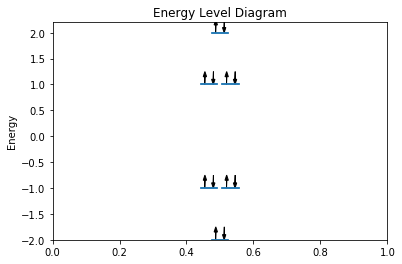

Electron energies: [-2. -2. -1. -1. -1. -1.  1.  1.  1.  1.  2.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Occupation numbers: [ 2.  2.  2.  2.  2.  2.]
Total ground state energy: 0.0b


In [237]:
# Very ugly function, try to improve

# Plots energy level diagram and determines electron energies
# args: ordered list of eigenvalues, number of electrons
# rets: list of energies for the Ne electrons
def energyLevel(evals,Ne,show=True):
    
    # parameters for drawing diagram
    mid = 0.5 # midpoint
    width = 0.05 # width of each line
    space = 0.015 # spacing between lines
    arrlen = 0.15 # arrow length
    hw = 0.01 # width of head of arrow
    hl = 0.1 # length of head of arrow

    # get unique list of energies
    # returns tuple of two arrays, ([energies],[multiplicity])
    uniq = np.unique(np.around(evals,4),return_counts=True)

    energies = np.zeros(Ne) # stores energies of each electron
    occu = np.zeros(evals.size) # occupation number
    filled = 0 # keep track of how many electrons are left
    orb = 1 # keep track of current orbital
    
    for i in range(uniq[0].size): # go through each unique energy level
        E = uniq[0][i]
        m = uniq[1][i] # multiplicity
        start = mid - 0.5*(m-1)*(width+space) # where first line is drawn (left edge)
        
        turn = 1 # 1st or 2nd sweep through level
        j = 0 # keep track of degenerate energy levels
        
        while j < m:
            xL = start + j*(width+space) - 0.5*width # set bounds for drawing line
            xR = xL + width
            plt.axhline(E,xmin=xL,xmax=xR) # draw horizontal line
            if filled < Ne:
                energies[filled] = E
                if turn == 1:
                    elec = np.mean([xL,xR]) - 0.25*width
                    plt.arrow(elec,E,0,arrlen,head_width=hw,head_length=hl,fc='k',ec='k')
                    filled += 1
                    occu[orb-1] = 1
                    if j == m-1:
                        turn = 2
                        j = 0
                        orb -= (m-1)
                        continue     
                elif turn == 2:
                    elec = np.mean([xL,xR]) + 0.25*width
                    plt.arrow(elec,E+arrlen+hl,0,-arrlen,head_width=hw,head_length=hl,fc='k',ec='k')
                    filled += 1
                    occu[orb-1] = 2
                orb += 1
            j += 1
    
    plt.ylabel("Energy")
    plt.xlim([0,1])
    plt.ylim([np.min(evals),np.max(evals)+2*hl])
    plt.title("Energy Level Diagram")
    if show:
        plt.show()
        
    return energies,occu

energies,occu = energyLevel(evals,Ne)
ETot = np.sum(energies)
print("Electron energies:",energies)
print("Occupation numbers:",occu)
print("Total ground state energy:",str(ETot)+"b")


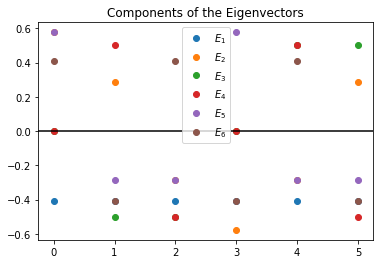

In [238]:
# Plot eigenvectors

for i in range(N):
    plt.plot(evecs[:,i],'o',label=r"$E_"+str(i+1)+"$")

plt.axhline(0,color='k')
plt.title("Components of the Eigenvectors")
plt.legend()
plt.show()

In [239]:
# Delocalization energy
# energy difference from ground state and isolated double bonds (compare to ethylene)
# 

# determine delocalization energy, given total ground state energy and number of double bonds
def calcDeloc(E,numDB):
    Ne_ethy = 2
    evals_ethy = getEigs(ethy)[0]
    E_ethy = energyLevel(evals_ethy,Ne_ethy,show=False)[0]
    ETot_ethy = np.sum(E_ethy)
    deloc = numDB*ETot_ethy - ETot

    return deloc

deloc = calcDeloc(ETot,db)

print(str(deloc)+"b")

-6.0b


In [223]:
# Charge density estimation 
# for single electron in orbital I, |c_Ir|^2 is probability of electron being on atom r

def chargeDensity(evecs,energies,occu):
    q = np.zeros(N)
        
    for r in range(N):
        c = evecs[r,:] # get the rth component of all eigenvectors
        cSq = np.square(c)
        q[r] = np.dot(cSq,occu)
    
    return q

q = chargeDensity(evecs,energies,occu)

print(q)

[ 1.  1.  1.  1.  1.  1.]


In [224]:
# Bond order calculation
# Known values:
# Butadiene - 0.89 0.45 0.89
# Benzene - 
# Toluene - 
# Naphthalene - 
# Buckyball - 

def bondOrder(adj,evecs,energies,occu):
    adjUp = np.tril(adj) # remove redundant elements
    r,s = np.nonzero(adjUp) # get indices of nonzero elements
    p = np.zeros(r.size)
    
    for i in range(r.size):
        cr = evecs[r[i],:]
        cs = evecs[s[i],:]
                
        cPr = np.multiply(cr,cs)
                
        p[i] = np.dot(cPr,occu)
    
    return p
    
p = bondOrder(adj,evecs,energies,occu)

print(p)

[ 0.667  0.667  0.667  0.667  0.667  0.667]


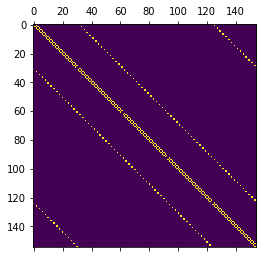

In [293]:
# Part B
# Construct adjacency matrix for graphene

# maps an (i,j) index from the square grid to the number of the atom at that location
def indexFind(i,j,rows,cols):
    i = i%cols
    j = j%rows
    return j*cols + i

# adds connection to adjacency matrix given 2 connected carbon atoms
def connect(n1,n2,adjMat):
    adjMat[n1,n2] = 1
    return

def constructZigzag(rows,cols):
    adjMat = np.zeros([rows*cols,rows*cols])
    
    for i in range(cols):
        for j in range(rows):
            cur = indexFind(i,j,rows,cols)
            
            connect(cur,indexFind(i+1,j,rows,cols),adjMat)
            connect(cur,indexFind(i-1,j,rows,cols),adjMat)
            
            if i%2 == j%2 and j != rows-1: 
                connect(cur,indexFind(i,j+1,rows,cols),adjMat)
            elif i%2 != j%2 and j != 0:
                connect(cur,indexFind(i,j-1,rows,cols),adjMat)    
    
    return adjMat


def constructArmchair(rows,cols):
    adjMat = np.zeros([rows*cols,rows*cols])
    
    for i in range(cols):
        for j in range(rows):
            cur = indexFind(i,j,rows,cols)
            
            if i != cols-1:
                connect(cur,indexFind(i+1,j,rows,cols),adjMat)
            if i != 0:
                connect(cur,indexFind(i-1,j,rows,cols),adjMat)
         
            if i%2 == j%2:
                connect(cur,indexFind(i,j+1,rows,cols),adjMat)
            else:
                connect(cur,indexFind(i,j-1,rows,cols),adjMat)    
        
    return adjMat


def constructAdj(rows,cols): 
    if rows > cols:
        adjMat = constructZigzag(rows,cols)
    else:
        adjMat = constructArmchair(rows,cols)
    return adjMat


zig = 4  # layers of hexagons connected on flat edge
arm = 15 # layers of hexagons connected in "armchair" pattern

# for zigzag configuration, use arm >> zig
# for armchair configuration, use zig >> arm

# Consider square lattice from "stretched" hex lattice
rows = zig+1  # number of rows in "stretched" square lattice
cols = arm*2 + 1  # number of columns in "stretched" square lattice

Nc = rows*cols # total number of carbon atoms
Ne = Nc # total number of pi electrons

graph = constructAdj(rows,cols) 

plt.matshow(graph)
plt.show()

[  3.034e+00   3.005e+00   2.958e+00   2.894e+00   2.812e+00   2.713e+00
   2.600e+00   2.509e+00   2.483e+00   2.472e+00   2.439e+00   2.424e+00
   2.397e+00   2.380e+00   2.352e+00   2.333e+00   2.305e+00   2.290e+00
   2.215e+00   2.212e+00   2.183e+00   2.118e+00   2.113e+00   2.025e+00
   2.011e+00   2.000e+00   1.891e+00   1.878e+00   1.864e+00   1.762e+00
   1.751e+00   1.705e+00   1.625e+00   1.621e+00   1.561e+00   1.493e+00
   1.485e+00   1.454e+00   1.414e+00   1.370e+00   1.369e+00   1.347e+00
   1.344e+00   1.302e+00   1.252e+00   1.246e+00   1.245e+00   1.219e+00
   1.216e+00   1.173e+00   1.173e+00   1.132e+00   1.110e+00   1.105e+00
   1.088e+00   1.030e+00   1.028e+00   1.000e+00   9.939e-01   9.349e-01
   8.927e-01   8.592e-01   8.258e-01   7.903e-01   7.280e-01   7.046e-01
   6.954e-01   6.309e-01   6.224e-01   5.939e-01   5.742e-01   4.382e-01
   3.027e-01   1.774e-01   7.780e-02   1.970e-02   1.400e-03  -0.000e+00
  -0.000e+00  -1.600e-03  -1.530e-02  -6.260e-02  -

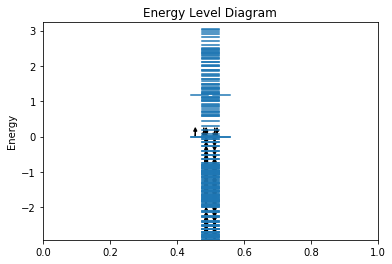

In [294]:
# Calculate eigenvalues/eigenvectors of graphene

evalsGraph,evecsGraph = getEigs(graph)
print(evalsGraph)
energies,occu = energyLevel(evalsGraph,Ne)

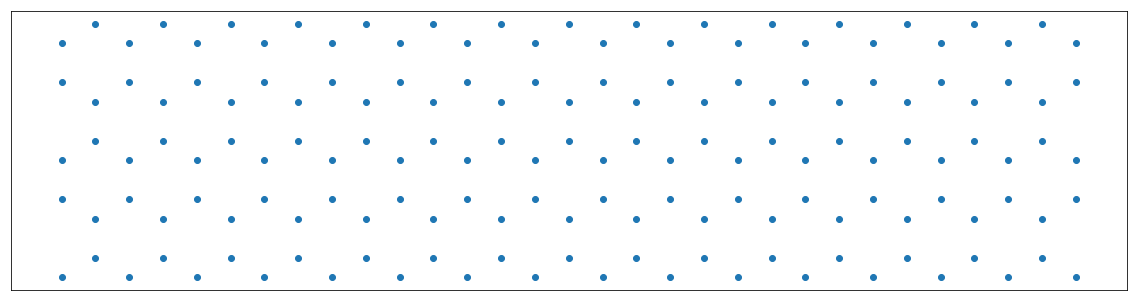

In [296]:
# drawing graphene lattice

# generate list of coordinates for each carbon
def getCoords(rows,cols):
    coords = np.zeros([rows*cols,2])
    bl = 1 # arbitrary bond length
    phi = np.pi / 6 # 
    dx = bl*np.cos(phi) # 
    dy = bl*np.sin(phi) # alternating increment in y direction along each row
    
    # for even row, initial y, y0_j = y0_j-1 - (bl + 2*dy)
    # for odd row, initial y, y0_j = y0_j-1 - bl
    # dy follows the pattern: 
    #     i%2 == j%2 -> +dy
    #     i%2 != j%2 -> -dy
    
    for j in range(rows):
        x = 0 # each row starts at x=0
        y = coords[indexFind(0,j-1,rows,cols),1] - bl
        
        if j%2 == 0: # for evens rows, increment by extra 2*dy
            y -= 2*dy
                
        for i in range(cols):
            cur = indexFind(i,j,rows,cols)
            coords[cur,0] = x
            coords[cur,1] = y
            
            x += dx
            if i%2 == j%2:
                y += dy
            else:
                y -= dy

    return coords

# calculate distance between 2 atoms
def dist(n1,n2,coords):
    x1,y1 = coords[n1,:]
    x2,y2 = coords[n2,:]
    
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

# finds the coordinates of each atom connect to a given atom
def getClosest(n,coords,adj):
    
    print(coords[adj[n,:],:])
    
    return

coords = getCoords(rows,cols)

plt.figure(figsize=(20,10))

if zig < arm:
    plt.scatter(coords[:,0],coords[:,1])
else:
    plt.scatter(coords[:,1],coords[:,0])
    
plt.axes().set_aspect('equal')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.show()


In [289]:
n = 4
getClosest(n,coords,adj)

IndexError: arrays used as indices must be of integer (or boolean) type